In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('Downloads/train.csv')
test = pd.read_csv('Downloads/test.csv')
image0 = train.iloc[0,1:]

In [3]:
image0 = image0.values.reshape(28,28)

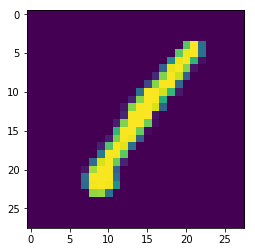

In [4]:
plt.imshow(image0)

In [5]:
x_train = (train.iloc[:,1:].values).astype("float")
y_train = (train.iloc[:,0].values).astype("int")
x_test = test.values.astype("float")

In [6]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [7]:
from keras.utils.np_utils import to_categorical
from keras.optimizers import Adam ,RMSprop
from sklearn.model_selection import train_test_split
from keras import  backend as K
from keras.preprocessing.image import ImageDataGenerator

E:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [8]:
from keras.models import Sequential,Model
from keras.layers import Dense , Dropout , Lambda, Flatten,Input

In [9]:
mean_px = x_train.mean().astype(np.float32)
std_px = x_train.std().astype(np.float32)

def standardize(x): 
    return (x-mean_px)/std_px 

In [10]:
y_train = to_categorical(y_train)

In [14]:
model1=Sequential()
model1.add(Lambda(standardize,input_shape=(28,28,1)))
model1.add(Flatten())
model1.add(Dense(10,activation = 'softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [15]:
#Deep neural network works good on large dataset but as in here there is samll amout of data relativel wats required for a neural net
#we will usebelow DataGenerator which generate image of different rotation and size hence multiply the data.
gen = ImageDataGenerator()

In [16]:
X = x_train
y = y_train
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42)
batches = gen.flow(x_train, y_train, batch_size=64)
val_batches=gen.flow(x_val, y_val, batch_size=64)

In [17]:
model1.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [18]:
history1 = model1.fit_generator(generator = batches , steps_per_epoch = batches.n, epochs = 6, validation_data = val_batches,
                               validation_steps = val_batches.n)

Instructions for updating:
Use tf.cast instead.
Epoch 1/6
37800/37800 [==============================] - 113s 3ms/step - loss: 0.2398 - acc: 0.9342 - val_loss: 0.3295 - val_acc: 0.9121
Epoch 2/6
37800/37800 [==============================] - 111s 3ms/step - loss: 0.2157 - acc: 0.9418 - val_loss: 0.3477 - val_acc: 0.9128
Epoch 3/6
37800/37800 [==============================] - 133s 4ms/step - loss: 0.2099 - acc: 0.9437 - val_loss: 0.3674 - val_acc: 0.9077
Epoch 4/6
37800/37800 [==============================] - 187s 5ms/step - loss: 0.2067 - acc: 0.9448 - val_loss: 0.3801 - val_acc: 0.9050
Epoch 5/6
37800/37800 [==============================] - 184s 5ms/step - loss: 0.2046 - acc: 0.9458 - val_loss: 0.3998 - val_acc: 0.9057
Epoch 6/6
37800/37800 [==============================] - 185s 5ms/step - loss: 0.2032 - acc: 0.9463 - val_loss: 0.4050 - val_acc: 0.9032


In [19]:
#here i have added one more layer to improve the accuracy
model=Sequential()
model.add(Lambda(standardize,input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(10,activation = 'softmax'))

In [20]:
model.compile(optimizer=RMSprop(lr=0.001),
 loss='categorical_crossentropy',
 metrics=['accuracy'])

In [21]:
history = model.fit_generator(generator = batches , steps_per_epoch = batches.n, epochs = 6, validation_data = val_batches,
                               validation_steps = val_batches.n)

Epoch 1/6
37800/37800 [==============================] - 139s 4ms/step - loss: 0.0207 - acc: 0.9938 - val_loss: 0.2310 - val_acc: 0.9726
Epoch 2/6
37800/37800 [==============================] - 141s 4ms/step - loss: 0.0010 - acc: 0.9999 - val_loss: 0.2851 - val_acc: 0.9743
Epoch 3/6
37800/37800 [==============================] - 157s 4ms/step - loss: 8.5959e-04 - acc: 0.9999 - val_loss: 0.2848 - val_acc: 0.9745
Epoch 4/6
37800/37800 [==============================] - 256s 7ms/step - loss: 8.5293e-04 - acc: 0.9999 - val_loss: 0.2844 - val_acc: 0.9745
Epoch 5/6
37800/37800 [==============================] - 275s 7ms/step - loss: 8.5959e-04 - acc: 0.9999 - val_loss: 0.2843 - val_acc: 0.9745
Epoch 6/6
37800/37800 [==============================] - 242s 6ms/step - loss: 8.4627e-04 - acc: 0.9999 - val_loss: 0.2846 - val_acc: 0.9745


In [22]:
predictions = model.predict_classes(x_test, verbose=0)

submissions=pd.DataFrame({"ImageId": list(range(1,len(predictions)+1)),
                         "Label": predictions})
submissions.to_csv("Downloads/DigiReco.csv", index=False, header=True)